In [636]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [675]:
org_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
sample = pd.read_csv("data/sample_submission.csv")

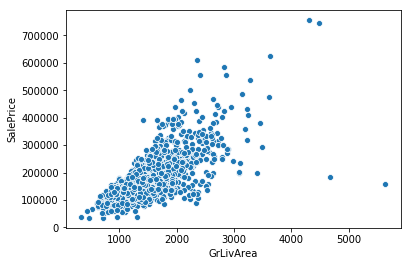

In [500]:
sns.scatterplot(x = "GrLivArea", y = "SalePrice", data = org_df)

In [502]:
org_df.loc[org_df["GrLivArea"] > 4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [589]:
org_df = org_df.loc[org_df["GrLivArea"] < 4500]

In [590]:
print(org_df.shape)
print(test_df.shape)

(1458, 81)
(1459, 80)


In [591]:
features_df = pd.concat([org_df, test_df], axis = 0).drop(["Id","SalePrice", "Utilities"], axis = 1)

In [575]:
features_df.shape

(2915, 78)

In [681]:
features_df.to_csv("cleaned_features.csv", index = False)

In [576]:
features_df["SaleType"].value_counts()

WD       2523
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [516]:
features_df.isna().sum()[features_df.isna().sum()!=0]

Series([], dtype: int64)

In [592]:
for col in ["BsmtCond", "BsmtQual", "BsmtFinType1", "BsmtExposure", "BsmtFinType2", "GarageType", "GarageFinish",
           "GarageQual", "GarageCond", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "MasVnrType",
           "KitchenQual", "Exterior1st", "Exterior2nd"]:
    features_df[col] = features_df[col].fillna("None")
    
for col in ["MasVnrArea", "GarageYrBlt", "TotalBsmtSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtFullBath", "BsmtHalfBath",
           "BsmtUnfSF", "GarageArea", "GarageCars"]:
    features_df[col] = features_df[col].fillna(0)

In [593]:
features_df["LotFrontage"] = features_df["LotFrontage"].fillna(np.median(features_df.loc[features_df["LotFrontage"].notnull(), "LotFrontage"]))

In [594]:
features_df["Electrical"] = features_df["Electrical"].fillna("SBrkr")
features_df["MSZoning"] = features_df["MSZoning"].fillna("RL")
features_df["Functional"] = features_df["Functional"].fillna("Typ")
features_df["SaleType"] = features_df["SaleType"].fillna("WD")

In [595]:
features_df[["MSSubClass", "OverallQual", "OverallCond"]] = features_df[["MSSubClass", "OverallQual", "OverallCond"]].astype("str")

In [596]:
dummied_features = pd.get_dummies(features_df, drop_first = True)
dummied_features.shape

(2917, 289)

In [597]:
train = dummied_features[:1458]
test = dummied_features[1458:]

In [598]:
target = org_df["SalePrice"]
log_target = np.log(target)

IndexError: index 33 is out of bounds for axis 0 with size 33

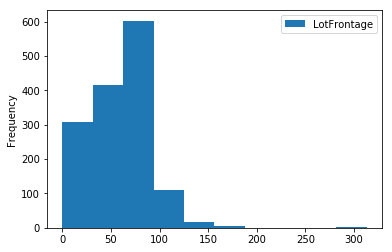

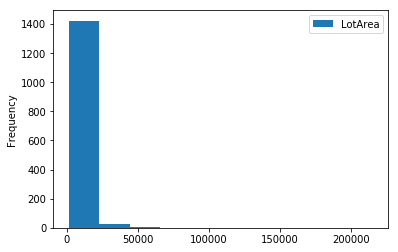

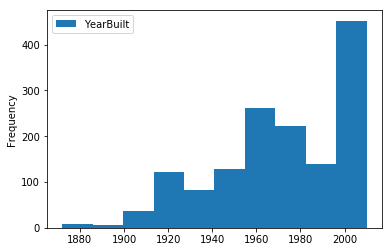

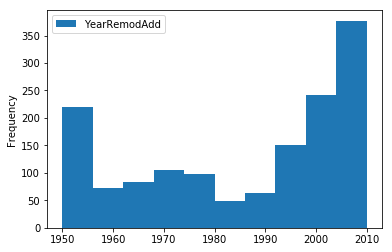

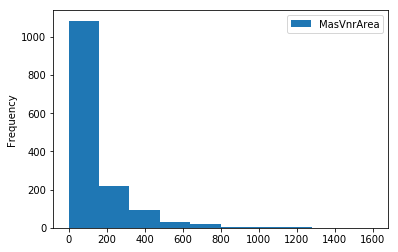

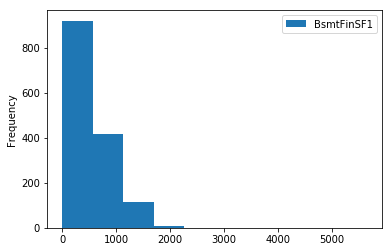

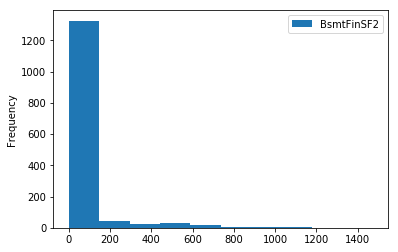

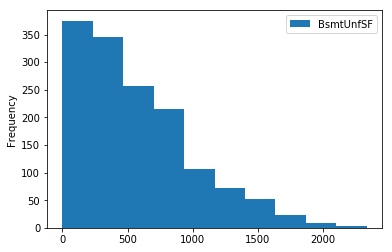

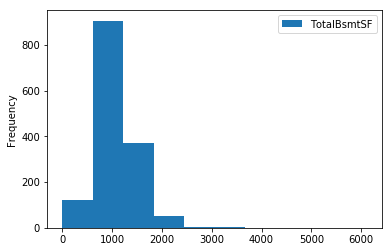

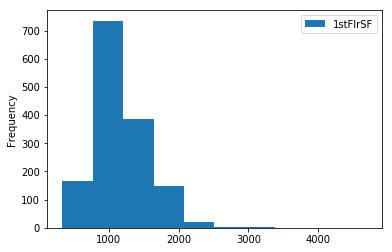

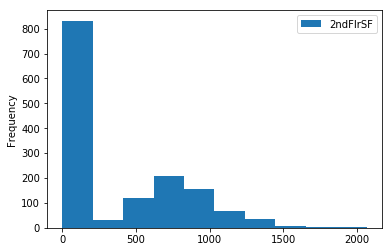

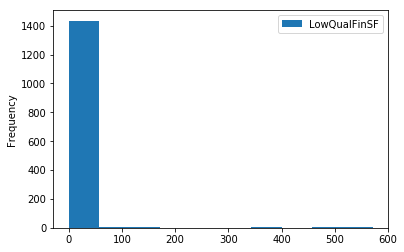

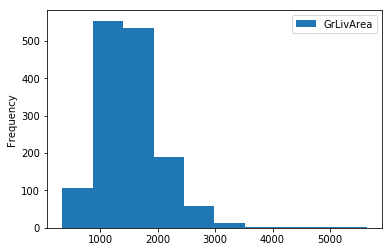

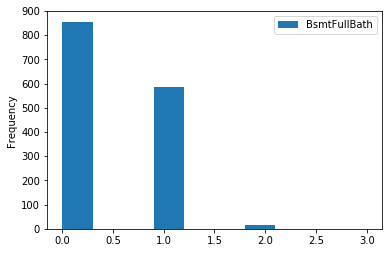

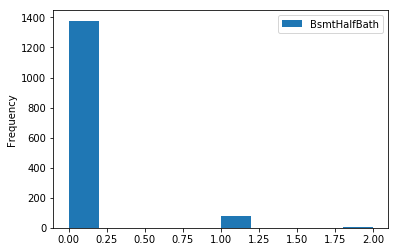

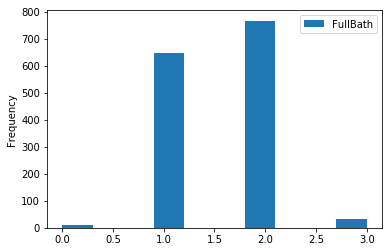

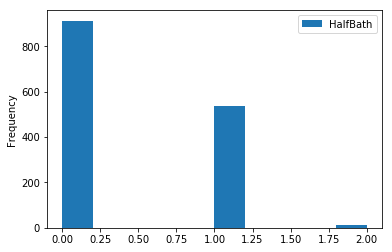

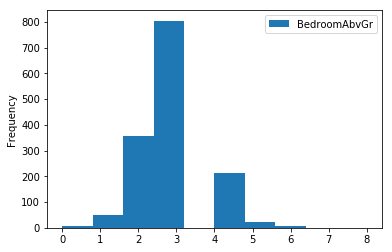

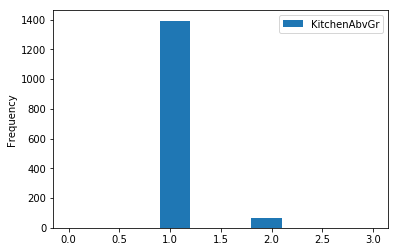

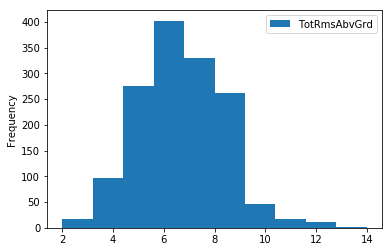

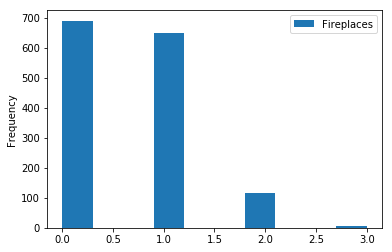

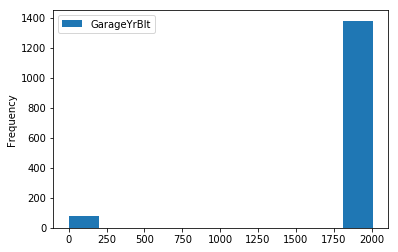

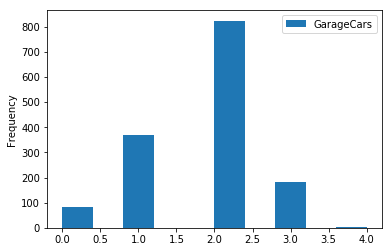

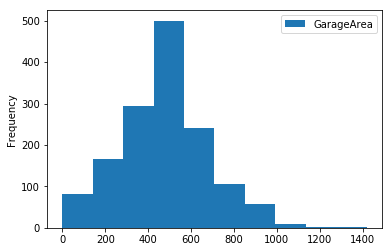

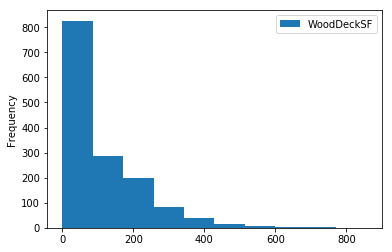

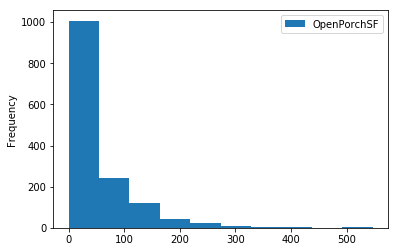

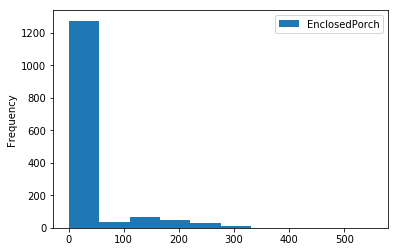

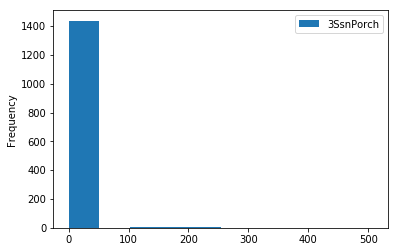

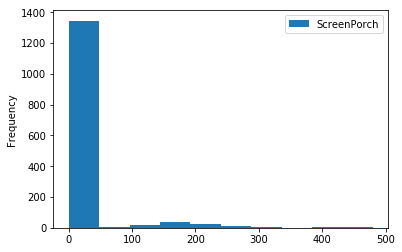

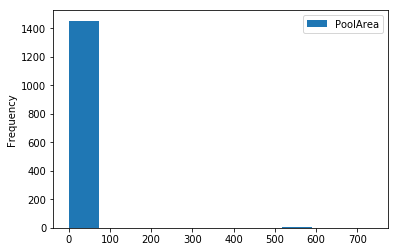

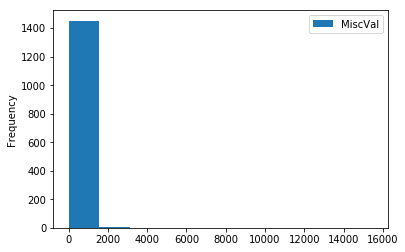

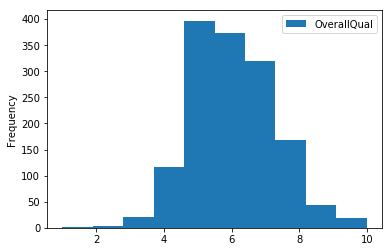

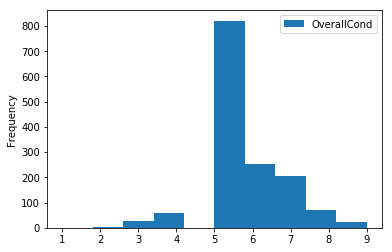

In [315]:
for i in range(0,len(features_df.columns)):
    ctn_features[[ctn_features.columns[i]]].plot.hist()

In [522]:
lasso.set_params(alpha = 0.000157, normalize = True)
lasso.fit(train, log_target)
coefs_df = pd.concat([pd.DataFrame(train.columns), pd.DataFrame(lasso.coef_)], axis = 1)
coefs_df.columns = ["Col", "Coef"]
coefs_df.sort_values(by="Coef", ascending = False)

,Col,Coef
258,OverallQual_9,0.185570
250,OverallQual_10,0.174928
223,Neighborhood_Crawfor,0.109218
262,PoolQC_Gd,0.094753
285,SaleType_New,0.084721
257,OverallQual_8,0.079128
63,CentralAir_Y,0.062628
140,Functional_Typ,0.059522
239,Neighborhood_StoneBr,0.058306
43,BsmtExposure_Gd,0.045862


In [224]:
pre_y = lasso.predict(train)

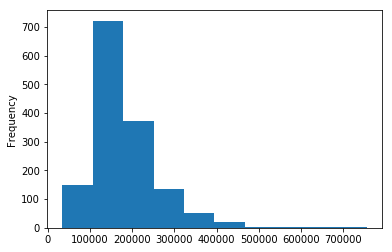

In [565]:
target.plot.hist()

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

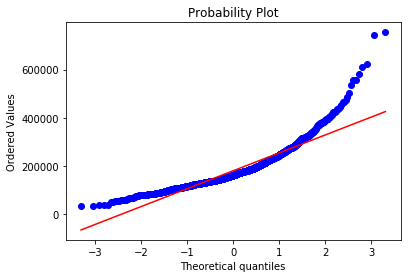

In [564]:
stats.probplot(target, plot=plt)

In [194]:
log_target = np.log1p(target_train)

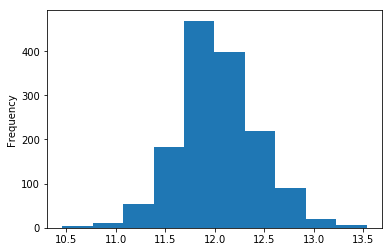

In [523]:
log_target.plot.hist()

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3985320692976512, 12.024008660964794, 0.9953918648311367))

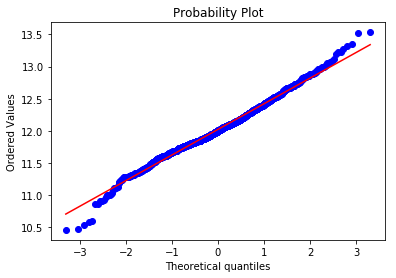

In [524]:
stats.probplot(log_target, plot=plt)

In [605]:
alphas = np.linspace(0.00005, 0.0002, 20)
grid_param = [{"alpha": alphas}]
lasso.set_params(normalize = True)
n_folds = 10

clf = GridSearchCV(lasso, grid_param, cv = n_folds, refit = False)
clf.fit(train, log_target)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [606]:
scores

array([0.9139053 , 0.91413108, 0.91422192, 0.91427674, 0.91437147,
       0.91447546, 0.91442122, 0.91437117, 0.91417845, 0.9139044 ,
       0.91366303, 0.91336538, 0.91293731, 0.91242036, 0.91188263,
       0.91132066, 0.9107199 , 0.91006805, 0.90935022, 0.90860789])

In [607]:
alphas

array([5.00000000e-05, 5.78947368e-05, 6.57894737e-05, 7.36842105e-05,
       8.15789474e-05, 8.94736842e-05, 9.73684211e-05, 1.05263158e-04,
       1.13157895e-04, 1.21052632e-04, 1.28947368e-04, 1.36842105e-04,
       1.44736842e-04, 1.52631579e-04, 1.60526316e-04, 1.68421053e-04,
       1.76315789e-04, 1.84210526e-04, 1.92105263e-04, 2.00000000e-04])

In [608]:
lasso.set_params(alpha = 0.00008947, normalize = False)

Lasso(alpha=8.947e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [609]:
lasso.fit(train, log_target)

Lasso(alpha=8.947e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [610]:
pre_log_y = lasso.predict(train)

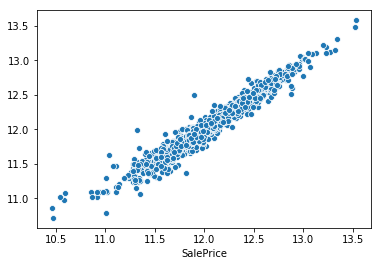

In [611]:
sns.scatterplot(x = log_target, y = pre_log_y)

In [389]:
log_target.shape

(1460,)

In [612]:
(np.mean((pre_log_y - log_target)**2))**.5

0.09198252534107275

In [533]:
log_residuals = pre_log_y - log_target

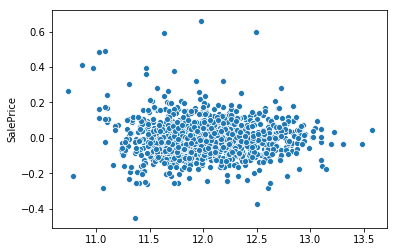

In [534]:
sns.scatterplot(x = pre_log_y, y = log_residuals)

In [560]:
lasso_pre = np.exp(lasso.predict(test))

In [561]:
lasso_pre

array([119557.55863177, 153858.68899476, 186569.01092183, ...,
       174491.04427285, 113933.3306877 , 214010.14757327])

In [562]:
sample["SalePrice"] = lasso_pre

In [558]:
len(sample)

1459

In [563]:
sample.to_csv("lasso_pre1.csv", index = False)

In [679]:
en = ElasticNet()
alphas = np.linspace(0, 0.01, 20)
l1_ratio = np.linspace(0, 1, 10)
grid_param = [{"alpha": alphas}]
lasso.set_params(normalize = True)
n_folds = 10

In [680]:
en

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [624]:
rf = RandomForestRegressor(max_depth=156, random_state=0, n_estimators=100)
le = preprocessing.LabelEncoder()
cat_cols = features_df.dtypes[(features_df.dtypes != "int64") & (features_df.dtypes != "float64")].index
tr_features = features_df.copy()

In [625]:
for col in cat_cols:
    le.fit(tr_features[col])
    tr_features[col] = le.transform(tr_features[col])

In [629]:
tr_train = tr_features[:1458]
tr_test = tr_features[1458:]

In [646]:
x_subtr, x_subtst, y_subtr, y_subtst = train_test_split(tr_train, log_target, test_size = 0.2, random_state = 0)

In [656]:
rf = RandomForestRegressor(max_depth=156, random_state=0, n_estimators=100)
rf.fit(x_subtr, y_subtr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=156,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [657]:
rf.score(x_subtst, y_subtst)

0.9087648982273663

In [672]:
gb = GradientBoostingRegressor(random_state = 0, learning_rate = 0.14)
gb.fit(x_subtr, y_subtr)
gb.score(x_subtst, y_subtst)

0.9294606061903528

In [673]:
gb_pre = gb.predict(tr_train)

In [674]:
(np.mean((gb_pre - log_target)**2))**.5

0.07858202169736161

In [676]:
sample["SalePrice"] = np.exp(gb.predict(tr_test))

In [678]:
sample.to_csv("gb1.csv", index = False)